In [1]:
# imports
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import statistics
from keras.regularizers import l2

from tensorflow.keras.optimizers import SGD

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(lbl_train, num_classes)
y_test = tf.keras.utils.to_categorical(lbl_test, num_classes)


In [4]:
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss = tf.keras.losses.categorical_crossentropy,
        optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 29s 4ms/step - loss: 0.8333 - accuracy: 0.7509 - val_loss: 0.2677 - val_accuracy: 0.9200
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2581 - accuracy: 0.9241 - val_loss: 0.1948 - val_accuracy: 0.9424
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1898 - accuracy: 0.9445 - val_loss: 0.1676 - val_accuracy: 0.9505
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1516 - accuracy: 0.9553 - val_loss: 0.1376 - val_accuracy: 0.9582
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1304 - accuracy: 0.9616 - val_loss: 0.1243 - val_accuracy: 0.9619
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1132 - accuracy: 0.9671 - val_loss: 0.1257 - val_accuracy: 0.9624
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1020 - accuracy: 0.9695 - val_loss: 0.1103 - val_accuracy: 0.9666
Epoch

In [5]:
print(fit_info.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### C)

In [6]:
v = fit_info.history['val_accuracy']
n = [1,2,3,4,5,6,7,8,9,10]

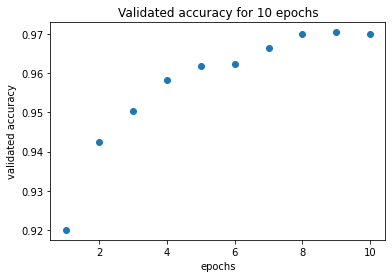

In [7]:
plt.scatter(n, v)
plt.title('Validated accuracy for 10 epochs')
plt.xlabel('epochs') 
plt.ylabel('validated accuracy')
plt.show()

In [8]:
a = fit_info.history['accuracy']
n = [1,2,3,4,5,6,7,8,9,10]

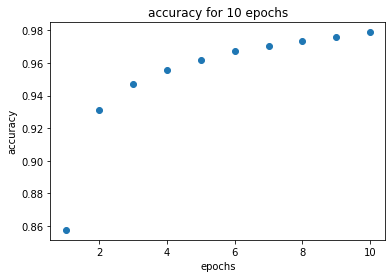

In [9]:
plt.scatter(n, a)
plt.title('accuracy for 10 epochs') 
plt.xlabel('epochs') 
plt.ylabel('accuracy') 
plt.show()

In [10]:
print(fit_info.history['val_accuracy'])

[0.9200000166893005, 0.9423999786376953, 0.9505000114440918, 0.9581999778747559, 0.961899995803833, 0.9624000191688538, 0.9666000008583069, 0.9700000286102295, 0.9704999923706055, 0.9700999855995178]


In [ ]:
cc = []
cc = fit_info.history['val_accuracy']
print(max(cc))

### D)

In [12]:
epochs = 40

In [13]:
model = Sequential()

model.add(Flatten())
model.add(Dense(300, activation = 'relu')) 
model.add(Dense(500, activation = 'relu')) 
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), metrics=['accuracy'])

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 6s 9ms/step - loss: 0.7408 - accuracy: 0.8032 - val_loss: 0.2426 - val_accuracy: 0.9273
Epoch 2/40
469/469 [==============================] - 4s 9ms/step - loss: 0.2128 - accuracy: 0.9384 - val_loss: 0.1613 - val_accuracy: 0.9532
Epoch 3/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1545 - accuracy: 0.9559 - val_loss: 0.1259 - val_accuracy: 0.9620
Epoch 4/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1217 - accuracy: 0.9662 - val_loss: 0.1127 - val_accuracy: 0.9667
Epoch 5/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0992 - accuracy: 0.9708 - val_loss: 0.1066 - val_accuracy: 0.9674
Epoch 6/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0808 - accuracy: 0.9764 - val_loss: 0.0945 - val_accuracy: 0.9712
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0689 - accuracy: 0.9798 - val_loss: 0.0862 - val_accuracy: 0.9730
Epo

In [21]:
model_weights = [0.001, 0.0002, 0.0003, 0.00005, 0.000001]

In [23]:
result = []
dump = []    
for w in model_weights:
        a_score = []
        b_score = []
        count = 1
        while count < 4 :
            model = Sequential()
            model.add(Flatten())
            model.add(Dense(300, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(500, activation = 'relu', kernel_regularizer = l2(w))) 
            model.add(Dense(num_classes, activation='softmax'))
            
            model.compile(loss=keras.losses.categorical_crossentropy,
                           optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate = 0.1), 
                          metrics=['accuracy'])
            
            fit_info = model.fit(x_train, y_train,
                       batch_size=batch_size,
                       epochs=epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))
            score = model.evaluate(x_test, y_test, verbose=0)
            a_score.append(score[1])
            b_score.append(score[0])
            count += 1
        result.append(a_score)
        dump.append(b_score)    

Epoch 1/40
469/469 [==============================] - 4s 6ms/step - loss: 1.5303 - accuracy: 0.8008 - val_loss: 0.9367 - val_accuracy: 0.9304
Epoch 2/40
469/469 [==============================] - 4s 7ms/step - loss: 0.9024 - accuracy: 0.9329 - val_loss: 0.7652 - val_accuracy: 0.9484
Epoch 3/40
469/469 [==============================] - 3s 7ms/step - loss: 0.7406 - accuracy: 0.9522 - val_loss: 0.6516 - val_accuracy: 0.9560
Epoch 4/40
469/469 [==============================] - 3s 6ms/step - loss: 0.6197 - accuracy: 0.9639 - val_loss: 0.5558 - val_accuracy: 0.9636
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.5303 - accuracy: 0.9694 - val_loss: 0.5032 - val_accuracy: 0.9584
Epoch 6/40
469/469 [==============================] - 3s 6ms/step - loss: 0.4611 - accuracy: 0.9713 - val_loss: 0.4285 - val_accuracy: 0.9676
Epoch 7/40
469/469 [==============================] - 3s 6ms/step - loss: 0.3958 - accuracy: 0.9757 - val_loss: 0.3779 - val_accuracy: 0.9714
Epoch 

469/469 [==============================] - 2s 5ms/step - loss: 0.1459 - accuracy: 0.9882 - val_loss: 0.1653 - val_accuracy: 0.9781
Epoch 19/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1374 - accuracy: 0.9895 - val_loss: 0.1548 - val_accuracy: 0.9798
Epoch 20/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1338 - accuracy: 0.9889 - val_loss: 0.1523 - val_accuracy: 0.9799
Epoch 21/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1271 - accuracy: 0.9894 - val_loss: 0.1500 - val_accuracy: 0.9789
Epoch 22/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1231 - accuracy: 0.9902 - val_loss: 0.1481 - val_accuracy: 0.9789
Epoch 23/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1171 - accuracy: 0.9906 - val_loss: 0.1466 - val_accuracy: 0.9778
Epoch 24/40
469/469 [==============================] - 2s 5ms/step - loss: 0.1148 - accuracy: 0.9910 - val_loss: 0.1381 - val_accuracy: 0.9796
Epoch 25/40

469/469 [==============================] - 3s 6ms/step - loss: 0.0933 - accuracy: 0.9933 - val_loss: 0.1226 - val_accuracy: 0.9812
Epoch 36/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0927 - accuracy: 0.9934 - val_loss: 0.1259 - val_accuracy: 0.9792
Epoch 37/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0923 - accuracy: 0.9925 - val_loss: 0.1309 - val_accuracy: 0.9780
Epoch 38/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0907 - accuracy: 0.9932 - val_loss: 0.1169 - val_accuracy: 0.9828
Epoch 39/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0900 - accuracy: 0.9936 - val_loss: 0.1178 - val_accuracy: 0.9815
Epoch 40/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0905 - accuracy: 0.9936 - val_loss: 0.1182 - val_accuracy: 0.9812
Epoch 1/40
469/469 [==============================] - 4s 7ms/step - loss: 0.9001 - accuracy: 0.8057 - val_loss: 0.3852 - val_accuracy: 0.9356
Epoch 2/40
4

469/469 [==============================] - 5s 10ms/step - loss: 0.1676 - accuracy: 0.9893 - val_loss: 0.1951 - val_accuracy: 0.9781
Epoch 13/40
469/469 [==============================] - 5s 11ms/step - loss: 0.1620 - accuracy: 0.9904 - val_loss: 0.1904 - val_accuracy: 0.9774
Epoch 14/40
469/469 [==============================] - 4s 9ms/step - loss: 0.1551 - accuracy: 0.9914 - val_loss: 0.1946 - val_accuracy: 0.9758
Epoch 15/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1477 - accuracy: 0.9926 - val_loss: 0.1817 - val_accuracy: 0.9792
Epoch 16/40
469/469 [==============================] - 5s 11ms/step - loss: 0.1428 - accuracy: 0.9936 - val_loss: 0.1749 - val_accuracy: 0.9793
Epoch 17/40
469/469 [==============================] - 5s 10ms/step - loss: 0.1375 - accuracy: 0.9940 - val_loss: 0.1717 - val_accuracy: 0.9799
Epoch 18/40
469/469 [==============================] - 5s 11ms/step - loss: 0.1335 - accuracy: 0.9944 - val_loss: 0.1694 - val_accuracy: 0.9799
Epoch

469/469 [==============================] - 3s 7ms/step - loss: 0.0930 - accuracy: 0.9991 - val_loss: 0.1396 - val_accuracy: 0.9812
Epoch 30/40
469/469 [==============================] - 4s 8ms/step - loss: 0.0907 - accuracy: 0.9992 - val_loss: 0.1362 - val_accuracy: 0.9819
Epoch 31/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0886 - accuracy: 0.9994 - val_loss: 0.1390 - val_accuracy: 0.9812
Epoch 32/40
469/469 [==============================] - 5s 10ms/step - loss: 0.0863 - accuracy: 0.9992 - val_loss: 0.1348 - val_accuracy: 0.9814
Epoch 33/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0842 - accuracy: 0.9992 - val_loss: 0.1319 - val_accuracy: 0.9820
Epoch 34/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0824 - accuracy: 0.9993 - val_loss: 0.1311 - val_accuracy: 0.9804
Epoch 35/40
469/469 [==============================] - 4s 9ms/step - loss: 0.0799 - accuracy: 0.9995 - val_loss: 0.1276 - val_accuracy: 0.9822
Epoch 36/4

469/469 [==============================] - 4s 8ms/step - loss: 0.2874 - accuracy: 0.9755 - val_loss: 0.2884 - val_accuracy: 0.9724
Epoch 7/40
469/469 [==============================] - 4s 8ms/step - loss: 0.2659 - accuracy: 0.9799 - val_loss: 0.2793 - val_accuracy: 0.9719
Epoch 8/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2499 - accuracy: 0.9827 - val_loss: 0.2634 - val_accuracy: 0.9744
Epoch 9/40
469/469 [==============================] - 4s 9ms/step - loss: 0.2399 - accuracy: 0.9833 - val_loss: 0.2496 - val_accuracy: 0.9773
Epoch 10/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2229 - accuracy: 0.9856 - val_loss: 0.2408 - val_accuracy: 0.9783
Epoch 11/40
469/469 [==============================] - 4s 9ms/step - loss: 0.2124 - accuracy: 0.9877 - val_loss: 0.2336 - val_accuracy: 0.9771
Epoch 12/40
469/469 [==============================] - 5s 10ms/step - loss: 0.2017 - accuracy: 0.9883 - val_loss: 0.2220 - val_accuracy: 0.9778
Epoch 13/40
4

469/469 [==============================] - 3s 7ms/step - loss: 0.1229 - accuracy: 0.9972 - val_loss: 0.1625 - val_accuracy: 0.9802
Epoch 24/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1184 - accuracy: 0.9971 - val_loss: 0.1602 - val_accuracy: 0.9810
Epoch 25/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1150 - accuracy: 0.9971 - val_loss: 0.1530 - val_accuracy: 0.9816
Epoch 26/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1105 - accuracy: 0.9973 - val_loss: 0.1498 - val_accuracy: 0.9828
Epoch 27/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1074 - accuracy: 0.9974 - val_loss: 0.1545 - val_accuracy: 0.9795
Epoch 28/40
469/469 [==============================] - 3s 6ms/step - loss: 0.1040 - accuracy: 0.9971 - val_loss: 0.1427 - val_accuracy: 0.9824
Epoch 29/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0985 - accuracy: 0.9983 - val_loss: 0.1416 - val_accuracy: 0.9825
Epoch 30/40

469/469 [==============================] - 3s 6ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9815
Epoch 1/40
469/469 [==============================] - 6s 10ms/step - loss: 0.7635 - accuracy: 0.8079 - val_loss: 0.2886 - val_accuracy: 0.9263
Epoch 2/40
469/469 [==============================] - 3s 7ms/step - loss: 0.2598 - accuracy: 0.9368 - val_loss: 0.1992 - val_accuracy: 0.9530
Epoch 3/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1948 - accuracy: 0.9561 - val_loss: 0.1703 - val_accuracy: 0.9617
Epoch 4/40
469/469 [==============================] - 3s 7ms/step - loss: 0.1632 - accuracy: 0.9653 - val_loss: 0.1571 - val_accuracy: 0.9644
Epoch 5/40
469/469 [==============================] - 4s 8ms/step - loss: 0.1403 - accuracy: 0.9713 - val_loss: 0.1408 - val_accuracy: 0.9690
Epoch 6/40
469/469 [==============================] - 4s 9ms/step - loss: 0.1262 - accuracy: 0.9758 - val_loss: 0.1321 - val_accuracy: 0.9722
Epoch 7/40
469/4

469/469 [==============================] - 3s 6ms/step - loss: 0.0612 - accuracy: 0.9959 - val_loss: 0.1077 - val_accuracy: 0.9784
Epoch 18/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0590 - accuracy: 0.9967 - val_loss: 0.1024 - val_accuracy: 0.9809
Epoch 19/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0566 - accuracy: 0.9976 - val_loss: 0.1025 - val_accuracy: 0.9801
Epoch 20/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0556 - accuracy: 0.9978 - val_loss: 0.1023 - val_accuracy: 0.9806
Epoch 21/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0543 - accuracy: 0.9982 - val_loss: 0.1044 - val_accuracy: 0.9798
Epoch 22/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0531 - accuracy: 0.9985 - val_loss: 0.1018 - val_accuracy: 0.9812
Epoch 23/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0509 - accuracy: 0.9989 - val_loss: 0.1010 - val_accuracy: 0.9806
Epoch 24/40

469/469 [==============================] - 3s 6ms/step - loss: 0.0044 - accuracy: 0.9999 - val_loss: 0.0702 - val_accuracy: 0.9802
Epoch 35/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0042 - accuracy: 0.9999 - val_loss: 0.0688 - val_accuracy: 0.9809
Epoch 36/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9798
Epoch 37/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9801
Epoch 38/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0703 - val_accuracy: 0.9811
Epoch 39/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0693 - val_accuracy: 0.9809
Epoch 40/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0706 - val_accuracy: 0.9806
Epoch 1/40


469/469 [==============================] - 3s 6ms/step - loss: 0.0394 - accuracy: 0.9892 - val_loss: 0.0774 - val_accuracy: 0.9768
Epoch 12/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0344 - accuracy: 0.9912 - val_loss: 0.0753 - val_accuracy: 0.9766
Epoch 13/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0309 - accuracy: 0.9926 - val_loss: 0.0819 - val_accuracy: 0.9748
Epoch 14/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0262 - accuracy: 0.9942 - val_loss: 0.0862 - val_accuracy: 0.9727
Epoch 15/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0233 - accuracy: 0.9947 - val_loss: 0.0671 - val_accuracy: 0.9796
Epoch 16/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0224 - accuracy: 0.9955 - val_loss: 0.0691 - val_accuracy: 0.9788
Epoch 17/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0199 - accuracy: 0.9961 - val_loss: 0.0644 - val_accuracy: 0.9797
Epoch 18/40

In [33]:
result

[[0.9733999967575073, 0.9800999760627747, 0.9811999797821045],
 [0.9771000146865845, 0.9818999767303467, 0.9817000031471252],
 [0.9805999994277954, 0.9810000061988831, 0.9811000227928162],
 [0.9814000129699707, 0.9818000197410583, 0.9821000099182129],
 [0.9815000295639038, 0.9821000099182129, 0.9818000197410583]]

In [34]:
def std_mean(lst):
    val_mean = []
    val_std = []
    
    for i in lst:
        val_mean.append(np.mean(i))
        val_std.append(np.std(i)) 
    return val_mean, val_std

In [35]:
standard_dev = []
mean_val = []

mean_val, standard_dev = std_mean(result)
print(standard_dev)
print()
print(mean_val)

[0.0034470513334274233, 0.0022170931642995105, 0.00021603294541564224, 0.0002867432554381771, 0.0002449409539585856]

[0.9782333175341288, 0.9802333315213522, 0.9809000094731649, 0.9817666808764139, 0.9818000197410583]


In [36]:
def get_bounds(lst, lst2):
    lst_u = []
    lst_l = []
    cc = 0
    
    for i in lst:
        t1 = i + lst2[cc]
        t2 = i - lst2[cc]
        lst_u.append(t1)
        lst_l.append(t2)
        cc += 1
    return lst_u, lst_l

In [37]:
standard_dev = []
mean_val = []

mean_val, standard_dev = std_mean(result)
print(standard_dev)
print()
print(mean_val)

[0.0034470513334274233, 0.0022170931642995105, 0.00021603294541564224, 0.0002867432554381771, 0.0002449409539585856]

[0.9782333175341288, 0.9802333315213522, 0.9809000094731649, 0.9817666808764139, 0.9818000197410583]


In [38]:
ul, ll = get_bounds(mean_val,standard_dev)
print(ul)
print()
print(ll)

[0.9816803688675562, 0.9824504246856517, 0.9811160424185805, 0.9820534241318521, 0.9820449606950169]

[0.9747862662007014, 0.9780162383570526, 0.9806839765277493, 0.9814799376209757, 0.9815550787870998]


In [39]:
x = ['0.001', '0.0002', '0.0003', '0.00005', '0.000001']

<function matplotlib.pyplot.show(close=None, block=None)>

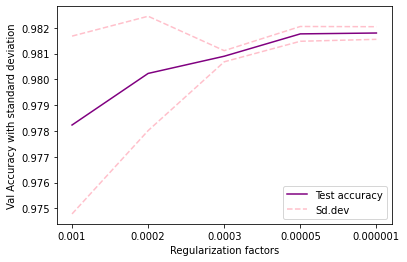

In [41]:
plt.plot(x,mean_val, color='purple')
plt.plot(x,ul,color='pink',linestyle='dashed')
plt.plot(x,ll,color='pink',linestyle='dashed')
plt.ylabel('Val Accuracy with standard deviation')
plt.xlabel('Regularization factors')
plt.legend(['Test accuracy', 'Sd.dev'], loc='lower right')
plt.savefig('accuracy')
plt.show